<a href="https://colab.research.google.com/github/HMRLKE/torch-dreams/blob/master/pretrained_imagenet_discriminator_test_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch-dreams  --upgrade
#!pip install opencv-python  --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

sys.path.append('/content/drive')
path = "/content" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)
%cd drive/MyDrive/biggan
%ls

/content/drive/MyDrive/biggan
'African chameleon, Chamaeleo chamaeleon.jpg'
'African crocodile, Nile crocodile, Crocodylus niloticus.jpg'
'African elephant, Loxodonta africana.jpg'
'African elephant, Loxodonta africana_just_D.jpg'
'African grey, African gray, Psittacus erithacus.jpg'
 agama.jpg
'alligator lizard.jpg'
'American alligator, Alligator mississipiensis.jpg'
'American chameleon, anole, Anolis carolinensis.jpg'
'axolotl, mud puppy, Ambystoma mexicanum.jpg'
'bald eagle, American eagle, Haliaeetus leucocephalus.jpg'
'bald eagle, American eagle, Haliaeetus leucocephalus_wo_D.jpg'
'bald eagle, American eagle, Haliaeetus leucocephalus_wo_hc.jpg'
'banded gecko.jpg'
'barn spider, Araneus cavaticus.jpg'
'barn spider, Araneus cavaticus_wo_D.jpg'
'barn spider, Araneus cavaticus_wo_hc.jpg'
'bee eater.jpg'
 biggan_all.py
 biggan_layers.py
 biggan.py
 BigGAN-PyTorch-master/
'black and gold garden spider, Argiope aurantia.jpg'
'black grouse.jpg'
'black widow, Latrodectus mactans.jpg'
'black

In [ ]:
from biggan_all import *


model = Discriminator(D_ch= 96).cuda()
model.load_state_dict(torch.load('/content/drive/MyDrive/biggan/D.pth'))

Adding attention layer in D at resolution 64
Param count for Ds initialized parameters: 87982369


<All keys matched successfully>

Gradient descent based on Hinge loss (used by Brock et. al) between output and the ground_truth w.r.t. the input




In [ ]:
!wget -O imagenet_classes.pkl "https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl"
## loads up imagenet classes into a dictionary 
import pickle
with open('imagenet_classes.pkl', 'rb') as f:
    imagenet_class_names = dict(pickle.load(f))
print(imagenet_class_names)


--2021-08-31 11:29:44--  https://cdn.hackaday.io/images/1219231493836853483.jpg
Resolving cdn.hackaday.io (cdn.hackaday.io)... 104.90.116.62
Connecting to cdn.hackaday.io (cdn.hackaday.io)|104.90.116.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15881 (16K) [image/jpeg]
Saving to: ‘elephant.jpg’

elephant.jpg        100%[===================>]  15.51K  --.-KB/s    in 0s      

2021-08-31 11:29:44 (109 MB/s) - ‘elephant.jpg’ saved [15881/15881]



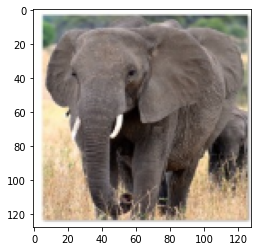

'African elephant, Loxodonta africana'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models 
from torch_dreams.dreamer import dreamer
from torch_dreams.model_bunch import ModelBunch
from torch_dreams.dreamer import dreamer


!wget -O elephant.jpg "https://cdn.hackaday.io/images/1219231493836853483.jpg"
im_original = cv2.cvtColor(cv2.imread('elephant.jpg'), cv2.COLOR_BGR2RGB)/255.
im_original = cv2.resize(im_original, (128,128))  ## resize to a smaller size for faster computations 
im = im_original
height , width , channels = im.shape
plt.imshow(im)
plt.show()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

image_tensor = torch.tensor(im).permute(-1,0,1).unsqueeze(0)
t = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

image_tensor_transformed = t(image_tensor).to(device).float()
imagenet_class_names[386]


In [ ]:
! cp gan/losses.py

cp: missing destination file operand after 'biggan/losses.py'
Try 'cp --help' for more information.


In [ ]:
def loss_hinge_dis(dis_fake):
  loss = torch.mean(F.relu(1. - dis_fake))
  #loss = torch.mean(F.relu(1. + dis_fake))
  return loss

wrong_label = torch.tensor([120])
right_label = torch.tensor([386])
a = model(
    x = image_tensor_transformed,
    y = wrong_label.cuda()
)
b = model(
    x = image_tensor_transformed,
    y = right_label.cuda()
)
print(a,b)
print(loss_hinge_dis(a),loss_hinge_dis(b))


tensor([[0.2703]], device='cuda:0', grad_fn=<AddBackward0>) tensor([[8.6498]], device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.7297, device='cuda:0', grad_fn=<MeanBackward0>) tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)


In [ ]:
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models 
from torch_dreams.dreamer import dreamer
from torch_dreams.model_bunch import ModelBunch
from torch_dreams.dreamer import dreamer
from google.colab import files

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  347462 KB |  695164 KB |  695164 KB |  347702 KB |\n|       from large pool |  345952 KB |  692144 KB |  692144 KB |  346192 KB |\n|       from small pool |    1510 KB |    3020 KB |    3020 KB |    1510 KB |\n|---------------------------------------------------------------------------|\n| Active memory         |  347462 KB |  695164 KB |  695164 KB |  347702 KB |\n|       from large pool |  345952 KB |  692144 KB |

In [ ]:

#indices = [1,3,9,13,4,7,22,60,37, 64,77,76,75,74,73,78,84,94]
indices = [386]
for a in indices:
  D_losses = []     #must be changed to dict - as per specific class C-loss and D-loss graphs
  C_losses = []


  def make_custom_func(layer_number = 0, channel_number= 0): 
      def custom_func(layer_outputs):
          loss = layer_outputs[layer_number][channel_number].mean()
          return loss
      return custom_func

  def optimize_single_class(layer_outputs):

      #m = loss_hinge_dis(layer_outputs[1])
      c_loss = layer_outputs[0][a]
      d_loss = layer_outputs[1]
      D_losses.append(d_loss)
      C_losses.append(-c_loss) 
      #print(c_loss,d_loss)
      loss =   layer_outputs[0][a] #- layer_outputs[1]   
      return loss

  bunch = ModelBunch(
      model_dict = {
          'resnet':    models.resnet18(pretrained= True).eval(),
          'discriminator': model
      }
  )

  layers_to_use = [
              bunch.model_dict['resnet'].fc,
              bunch.model_dict['discriminator'].linear
          ]

  dreamy_boi = dreamer(model = bunch, quiet= True, device= 'cuda')

  my_transforms = transforms.Compose([
                          transforms.RandomAffine(degrees = 0, translate =  (0, 0))])
  dreamy_boi.set_custom_transforms(transforms = my_transforms)

  #main loop should start here
  out = dreamy_boi.render(
      layers = layers_to_use,
      custom_func = optimize_single_class,
      height = 128, 
      width = 128,
      iters = 200,
      grad_clip= 1,
      lr  = 0.01
  )
  a = imagenet_class_names[a]
  plt.imshow(out)
  filename = a+'_just_D.jpg'
  out.save(filename)



  #files.download(filename)

RuntimeError: ignored

200


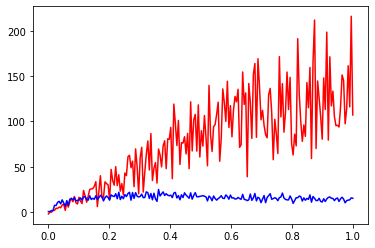

In [ ]:
from numpy import *
print(len(D_losses))
t = linspace(0,1, len(D_losses))

plt.plot(t, D_losses, 'r') # plotting t, a separately 
plt.plot(t, C_losses, 'b') # plotting t, b separately  # plotting t, c separately 
plt.show()

In [ ]:
#alternating


#indices = [1,3,9,13,4,7,22,60,37, 64,77,76,75,74,73,78,84,94]
indices = [386]
for a in indices:
  D_losses = []     #must be changed to dict - as per specific class C-loss and D-loss graphs
  C_losses = []


  #def make_custom_func(layer_number = 0, channel_number= 0): 
  #    def custom_func(layer_outputs):
  #        loss = layer_outputs[layer_number][channel_number].mean()
  #        return loss
  #    return custom_func

  def optimize_C(layer_outputs):
      c_loss = layer_outputs[0][a]
      C_losses.append(-c_loss) 
      D_losses.append(D_losses[-1]) 
      #print(c_loss,d_loss)
      loss =   c_loss
      return loss

  def optimize_D(layer_outputs):
      d_loss = layer_outputs[1]
      D_losses.append(d_loss)
      C_losses.append(C_losses[-1])
      loss =  d_loss   
      return -loss

  bunch = ModelBunch(
      model_dict = {
          'resnet':    models.resnet18(pretrained= True).eval(),
          'discriminator': model
      }
  )

  layers_to_use = [
              bunch.model_dict['resnet'].fc,
              bunch.model_dict['discriminator'].linear
          ]

  dreamy_boi = dreamer(model = bunch, quiet= True, device= 'cuda')

  my_transforms = transforms.Compose([
                          transforms.RandomAffine(degrees = 15, translate =  (0.5, 0.5))])
  dreamy_boi.set_custom_transforms(transforms = my_transforms)

  #main loop should start here
  out = dreamy_boi.render(
      layers = layers_to_use,
      custom_func = optimize_single_class,
      height = 128, 
      width = 128,
      iters = 200,
      grad_clip= 1,
      lr  = 0.01
  )
  a = imagenet_class_names[a]
  plt.imshow(out)
  filename = a+'_just_D.jpg'
  out.save(filename)



  #files.download(filename)

RuntimeError: ignored

In [ ]:
wrong_label = torch.tensor([3])

model(
    x = image_tensor_transformed.cuda(),
    y = wrong_label.cuda()
)

tensor([[5.5467]], device='cuda:0', grad_fn=<AddBackward0>)

In [ ]:
out = dreamy_boi.render(
    layers = layers_to_use,
    custom_func = optimize_single_class,
    height = 128, 
    width = 128,
    iters = 200,
    grad_clip= 0.5,
    lr  = 0.003
)

100%|██████████| 200/200 [00:15<00:00, 12.65it/s]


In [ ]:
plt.imshow(out)

TypeError: ignored

In [ ]:
plt.imsave('test.png', out)

ValueError: ignored

In [ ]:
with open('/content/drive/MyDrive/biggan/outputs/out.png', 'w') as f:


TypeError: ignored

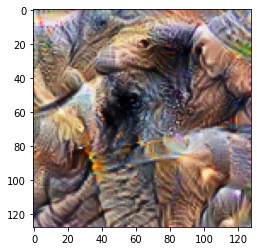

In [ ]:
plt.imshow(out)  # without D 

In [ ]:
out.save(filename = 'my_image.jpg')

from google.colab import files
files.download('my_image.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>